In [1]:
from skimage.io import imread, imsave
from pyclesperanto_prototype import imshow, replace_intensities
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from napari_simpleitk_image_processing import label_statistics
import apoc
import os
import pyclesperanto_prototype as cle
import napari
from skimage.segmentation import relabel_sequential

cle.select_device("Intel(R) Iris(TM) Plus Graphics 640")

<Intel(R) Iris(TM) Plus Graphics 640 on Platform: Apple (2 refs)>

In [2]:
table = pd.read_csv("/Users/mara/Desktop/Bachelorarbeit/Robert - PoL/beautiful notebooks <3/4. Applying on testing data/Testingdata_Correlation_filtered_exclusion.csv")

In [3]:
table

,Unnamed: 0,label,area_norm,max_intensity_norm,mean_intensity_norm,min_intensity_norm,solidity_norm,extent_norm,local_centroid-0_norm,local_centroid-1_norm,...,roundness_norm,number_of_pixels_on_border_norm,perimeter_on_border_ratio_norm,max_intensity_raw,mean_intensity_raw,min_intensity_raw,standard_deviation_intensity_raw,sum_raw,variance_raw,filename
0,0,1,149,3.185185,1.397216,0.370370,0.943038,0.716346,11.315436,2.657718,...,0.755849,26,0.454161,86.0,37.724832,10.0,16.022576,5621.0,258.457555,img04_20220429_ET358_56hpf_4.tif
1,1,2,502,7.370370,2.278663,0.296296,0.934823,0.747024,18.278884,6.354582,...,0.771940,42,0.408203,199.0,61.523904,8.0,38.078374,30885.0,1452.856713,img04_20220429_ET358_56hpf_4.tif
2,2,3,2356,9.444444,2.557961,0.259259,0.806849,0.383089,38.816214,44.974109,...,0.613550,0,0.000000,255.0,69.064941,7.0,45.398851,162717.0,2061.930813,img04_20220429_ET358_56hpf_4.tif
3,3,4,366,4.777778,1.729609,0.296296,0.903704,0.687970,13.683060,7.800546,...,0.874059,0,0.000000,129.0,46.699454,8.0,26.197596,17092.0,688.194356,img04_20220429_ET358_56hpf_4.tif
4,4,5,60,2.555556,1.225926,0.481481,0.967742,0.750000,4.716667,3.750000,...,0.979928,0,0.000000,69.0,33.100000,13.0,12.719670,1986.0,164.532203,img04_20220429_ET358_56hpf_4.tif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119,26,219,2.600000,0.930137,0.000000,0.682243,0.461053,13.497717,9.744292,...,0.603159,0,0.000000,26.0,9.301370,0.0,4.492566,2037.0,20.275732,img16_20220520_hsp-mKate-DN-dynactin_56hpf_3.tif
120,120,27,82,2.600000,1.052439,0.100000,0.921348,0.854167,5.390244,3.524390,...,0.901556,0,0.000000,26.0,10.524390,1.0,5.715246,863.0,33.067299,img16_20220520_hsp-mKate-DN-dynactin_56hpf_3.tif
121,121,28,314,3.600000,1.242357,0.000000,0.844086,0.528620,15.105096,9.280255,...,0.695580,0,0.000000,36.0,12.423567,0.0,6.342322,3901.0,40.353564,img16_20220520_hsp-mKate-DN-dynactin_56hpf_3.tif
122,122,29,470,3.800000,1.027660,0.100000,0.732087,0.502137,11.200000,21.014894,...,0.547256,0,0.000000,38.0,10.276596,1.0,5.071414,4830.0,25.774078,img16_20220520_hsp-mKate-DN-dynactin_56hpf_3.tif


In [4]:
image_folder = "/Users/mara/Desktop/Bachelorarbeit/Robert - PoL/20220523_training data/no training data/1. images/"
label_folder = "/Users/mara/Desktop/Bachelorarbeit/Robert - PoL/20220523_training data/no training data/3. in range result of object segmenter/"

In [5]:
file_list = sorted(os.listdir(image_folder))
file_list

['img04_20220429_ET358_56hpf_4.tif',
 'img07_20220513_ET358_56hpf_3.tif',
 'img09_20220513_ET358_56hpf_5.tif',
 'img11_20220513_ET358_56hpf_7.tif',
 'img16_20220520_hsp-mKate-DN-dynactin_56hpf_3.tif']

In [6]:
image_list = []
label_list = []
annotation_list = []

In [7]:
for i, filename in enumerate(file_list):
    image = imread(image_folder + filename)
    label = imread(label_folder + filename)
    image_list.append(image)
    label_list.append(label)

In [8]:
classifier = apoc.TableRowClassifier(opencl_filename="/Users/mara/Desktop/Bachelorarbeit/Robert - PoL/beautiful notebooks <3/3.2 Approach 2 (easier)_ First excluding small labels _ then Table/table_row_classifier_all_measurements_sorted.cl")

# Prediction

In [9]:
predicted_classes = classifier.predict(table)

/Users/mara/opt/anaconda3/envs/devbio-napari-env/lib/python3.9/site-packages/pyopencl/invoker.py:366: UserWarning: Kernel 'predict' has 100 arguments with a total size of 800 bytes, which approaches the limit of 1024 bytes on <pyopencl.Device 'Intel(R) Iris(TM) Plus Graphics 640' on 'Apple' at 0x600003489100>. This might lead to compilation errors, especially on GPU devices.
  warn(f"Kernel '{function_name}' has {num_cl_args} arguments with "


In [10]:
table['predicted_class'] = predicted_classes
table

,Unnamed: 0,label,area_norm,max_intensity_norm,mean_intensity_norm,min_intensity_norm,solidity_norm,extent_norm,local_centroid-0_norm,local_centroid-1_norm,...,number_of_pixels_on_border_norm,perimeter_on_border_ratio_norm,max_intensity_raw,mean_intensity_raw,min_intensity_raw,standard_deviation_intensity_raw,sum_raw,variance_raw,filename,predicted_class
0,0,1,149,3.185185,1.397216,0.370370,0.943038,0.716346,11.315436,2.657718,...,26,0.454161,86.0,37.724832,10.0,16.022576,5621.0,258.457555,img04_20220429_ET358_56hpf_4.tif,2
1,1,2,502,7.370370,2.278663,0.296296,0.934823,0.747024,18.278884,6.354582,...,42,0.408203,199.0,61.523904,8.0,38.078374,30885.0,1452.856713,img04_20220429_ET358_56hpf_4.tif,2
2,2,3,2356,9.444444,2.557961,0.259259,0.806849,0.383089,38.816214,44.974109,...,0,0.000000,255.0,69.064941,7.0,45.398851,162717.0,2061.930813,img04_20220429_ET358_56hpf_4.tif,1
3,3,4,366,4.777778,1.729609,0.296296,0.903704,0.687970,13.683060,7.800546,...,0,0.000000,129.0,46.699454,8.0,26.197596,17092.0,688.194356,img04_20220429_ET358_56hpf_4.tif,2
4,4,5,60,2.555556,1.225926,0.481481,0.967742,0.750000,4.716667,3.750000,...,0,0.000000,69.0,33.100000,13.0,12.719670,1986.0,164.532203,img04_20220429_ET358_56hpf_4.tif,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119,26,219,2.600000,0.930137,0.000000,0.682243,0.461053,13.497717,9.744292,...,0,0.000000,26.0,9.301370,0.0,4.492566,2037.0,20.275732,img16_20220520_hsp-mKate-DN-dynactin_56hpf_3.tif,1
120,120,27,82,2.600000,1.052439,0.100000,0.921348,0.854167,5.390244,3.524390,...,0,0.000000,26.0,10.524390,1.0,5.715246,863.0,33.067299,img16_20220520_hsp-mKate-DN-dynactin_56hpf_3.tif,2
121,121,28,314,3.600000,1.242357,0.000000,0.844086,0.528620,15.105096,9.280255,...,0,0.000000,36.0,12.423567,0.0,6.342322,3901.0,40.353564,img16_20220520_hsp-mKate-DN-dynactin_56hpf_3.tif,1
122,122,29,470,3.800000,1.027660,0.100000,0.732087,0.502137,11.200000,21.014894,...,0,0.000000,38.0,10.276596,1.0,5.071414,4830.0,25.774078,img16_20220520_hsp-mKate-DN-dynactin_56hpf_3.tif,1


In [11]:
number_elements = []

In [12]:
for label in label_list:
    in_label = np.unique(label)
    number_elements.append(max(in_label))

In [13]:
number_elements

[22, 17, 21, 34, 30]

In [14]:
def make_slices(list_of_sizes):
    '''Make a list of slice objects from a list of sizes'''
    # sizes = [len(n) for n in list_of_objects] 
    slice_list = []
    for i, n in enumerate(list_of_sizes):
        if i==0:
            n_1 = 0
            slc = slice(n)
        else:        
            slc = slice(n_1, n_1 + n)
        n_1 += n
        slice_list += [slc]
    return slice_list

In [15]:
slice_list = make_slices(number_elements)

In [16]:
prediction_per_image_list = []

In [17]:
for slc in slice_list:
    prediction_per_image = table['predicted_class'] [slc]
    prediction_per_image_list.append(prediction_per_image)

In [18]:
predicted_classes_with_background = []
prediction = []

In [19]:
for prediction in prediction_per_image_list:
    predicted_class_with_background = [0] + prediction.tolist()
    predicted_classes_with_background.append(predicted_class_with_background)

In [20]:
result_of_object_classifier = "/Users/mara/Desktop/Bachelorarbeit/Robert - PoL/20220523_training data/no training data/4. result of object classifier training data/"

In [21]:
os.makedirs(result_of_object_classifier, exist_ok=True)

img04_20220429_ET358_56hpf_4.tif


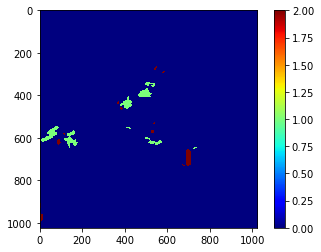

img07_20220513_ET358_56hpf_3.tif


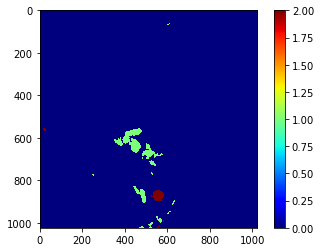

img09_20220513_ET358_56hpf_5.tif


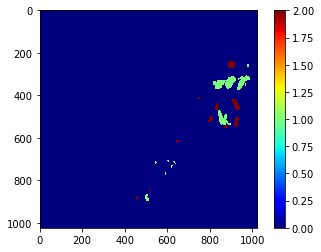

img11_20220513_ET358_56hpf_7.tif


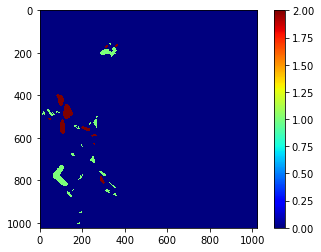

img16_20220520_hsp-mKate-DN-dynactin_56hpf_3.tif


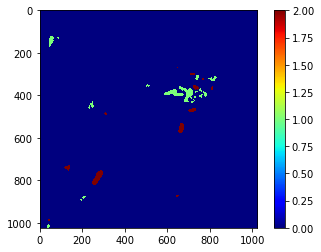

In [22]:
for label, prediction, filename in zip(label_list,predicted_classes_with_background, file_list):
    class_image = replace_intensities(label, prediction)
    print(filename)
    imshow(class_image, colorbar= True,colormap='jet',min_display_intensity=0)
    imsave(result_of_object_classifier+filename, class_image)

## Selecting only rows with prediction = 2

In [23]:
good_crystals = table.loc[table['predicted_class'] == 2]
good_crystals

,Unnamed: 0,label,area_norm,max_intensity_norm,mean_intensity_norm,min_intensity_norm,solidity_norm,extent_norm,local_centroid-0_norm,local_centroid-1_norm,...,number_of_pixels_on_border_norm,perimeter_on_border_ratio_norm,max_intensity_raw,mean_intensity_raw,min_intensity_raw,standard_deviation_intensity_raw,sum_raw,variance_raw,filename,predicted_class
0,0,1,149,3.185185,1.397216,0.370370,0.943038,0.716346,11.315436,2.657718,...,26,0.454161,86.0,37.724832,10.0,16.022576,5621.0,258.457555,img04_20220429_ET358_56hpf_4.tif,2
1,1,2,502,7.370370,2.278663,0.296296,0.934823,0.747024,18.278884,6.354582,...,42,0.408203,199.0,61.523904,8.0,38.078374,30885.0,1452.856713,img04_20220429_ET358_56hpf_4.tif,2
3,3,4,366,4.777778,1.729609,0.296296,0.903704,0.687970,13.683060,7.800546,...,0,0.000000,129.0,46.699454,8.0,26.197596,17092.0,688.194356,img04_20220429_ET358_56hpf_4.tif,2
4,4,5,60,2.555556,1.225926,0.481481,0.967742,0.750000,4.716667,3.750000,...,0,0.000000,69.0,33.100000,13.0,12.719670,1986.0,164.532203,img04_20220429_ET358_56hpf_4.tif,2
6,6,7,93,2.962963,1.316209,0.296296,0.930000,0.715385,5.709677,4.709677,...,0,0.000000,80.0,35.537634,8.0,13.563518,3305.0,185.968677,img04_20220429_ET358_56hpf_4.tif,2
8,8,9,114,2.222222,1.073424,0.333333,0.982759,0.797203,5.991228,4.868421,...,0,0.000000,60.0,28.982456,9.0,9.614483,3304.0,93.256327,img04_20220429_ET358_56hpf_4.tif,2
15,15,16,194,3.925926,1.620466,0.333333,0.974874,0.808333,7.242268,7.278351,...,0,0.000000,106.0,43.752577,9.0,20.818326,8488.0,435.648309,img04_20220429_ET358_56hpf_4.tif,2
16,16,17,57,2.111111,1.087070,0.296296,0.950000,0.791667,3.947368,3.385965,...,0,0.000000,57.0,29.350877,8.0,10.188558,1673.0,105.660401,img04_20220429_ET358_56hpf_4.tif,2
17,17,18,179,4.296296,1.776743,0.370370,0.952128,0.639286,9.910615,6.458101,...,0,0.000000,116.0,47.972067,10.0,24.527132,8587.0,604.959890,img04_20220429_ET358_56hpf_4.tif,2
18,18,19,95,2.185185,1.131774,0.444444,0.913462,0.608974,5.757895,6.452632,...,0,0.000000,59.0,30.557895,12.0,9.820190,2903.0,97.462038,img04_20220429_ET358_56hpf_4.tif,2


In [24]:
good_crystals.to_csv("Testingdata_good_crystals.csv")